<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/ML_Project_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
import torch
import pandas as pd
import seaborn as sns
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skm

# Grabbing the CSV file from drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/train.csv'
genre = pd.DataFrame(pd.read_csv(file_path))
genre.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
# Shows amount of null values in each colum
genre.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
# Replaces null values with 0s
genre=genre.fillna(0)
genre.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.000000,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.000000,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
# Removing unneeded inputs
varlist = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class']

genre = genre[varlist]
genre.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.000000,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.000000,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
# Seperate the inputs from outputs and Scale X inputs
sc_X = StandardScaler()

varlist_new = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']
genre[varlist_new] = sc_X.fit_transform(genre[varlist_new])

X = genre[varlist_new].values

X

array([[ 0.89413242,  1.86791514, -0.41967148, ...,  0.38712996,
         0.30228365,  0.21006549],
       [ 0.56990729, -0.97094593,  0.64250026, ..., -0.20862857,
         0.45531168,  0.21006549],
       [-0.45680564, -0.65819005, -0.20723713, ...,  0.84738275,
        -0.81329315,  0.21006549],
       ...,
       [-0.51084316,  0.08761243,  1.35203098, ..., -0.59597137,
         0.13820959,  0.21006549],
       [-0.78103077, -1.97537347,  0.60426208, ...,  0.29555284,
         0.16920453,  0.21006549],
       [-0.02450546, -0.86268428,  0.80819905, ...,  0.5234473 ,
        -0.1653551 ,  0.21006549]])

In [ ]:
# Set Output

Y = genre['Class']
Y

0         5
1        10
2         6
3         5
4        10
         ..
17991     6
17992     2
17993     8
17994     8
17995    10
Name: Class, Length: 17996, dtype: int64

In [ ]:
# Generate torches from inputs and outputs
x = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(Y, dtype = torch.long)
x.size(),y.size()

(torch.Size([17996, 14]), torch.Size([17996]))

In [ ]:
n_samples = x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_x = x[train_indices]

val_x = x[val_indices]

train_y = y[train_indices]

val_y = y[val_indices]

train_dataset = TensorDataset(train_x, train_y)
valid_dataset = TensorDataset(val_x, val_y)

train_indices.size(), val_indices.size()

(torch.Size([14397]), torch.Size([3599]))

In [ ]:
val_y.size(), train_y.size()

(torch.Size([3599]), torch.Size([14397]))

In [ ]:
# Model for Centural Neural Network
model = nn.Sequential(
            nn.Linear(14, 28),
            nn.Tanh(),
            nn.Linear(28, 56),
            nn.Tanh(),
            nn.Linear(56, 28),
            nn.Tanh(),
            nn.Linear(28, 11),
            nn.LogSoftmax(dim=1))

loss_fn = nn.NLLLoss()

model

Sequential(
  (0): Linear(in_features=14, out_features=28, bias=True)
  (1): Tanh()
  (2): Linear(in_features=28, out_features=56, bias=True)
  (3): Tanh()
  (4): Linear(in_features=56, out_features=28, bias=True)
  (5): Tanh()
  (6): Linear(in_features=28, out_features=11, bias=True)
  (7): LogSoftmax(dim=1)
)

In [ ]:
P = model(x)
P.type()

'torch.FloatTensor'

In [ ]:
#Training Data
trainLoader = DataLoader(train_dataset, batch_size=22, shuffle=True)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

n_epochs = 100

for epoch in range(1,n_epochs+1):
    for inputs, labels in trainLoader :
        output = model(inputs)
        loss = loss_fn(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch == 1 or epoch % 10 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in trainLoader :
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print(f'Accuracy on the training set: {(correct/total) * 100:.2f}%')

Epoch: 1, Loss: 1.864477
Epoch: 10, Loss: 1.287123
Epoch: 20, Loss: 1.046219
Epoch: 30, Loss: 1.170813
Epoch: 40, Loss: 1.252459
Epoch: 50, Loss: 0.728444
Epoch: 60, Loss: 1.580426
Epoch: 70, Loss: 0.908488
Epoch: 80, Loss: 1.207051
Epoch: 90, Loss: 0.681223
Epoch: 100, Loss: 1.314241
Accuracy on the training set: 55.39%


In [ ]:
validLoader = DataLoader(valid_dataset,batch_size=22, shuffle=True)

correct = 0
total = 0

true_labels = []
pred_labels = []

with torch.no_grad():
    for inputs, labels in validLoader :
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

        macro_f1 = skm.f1_score(true_labels, pred_labels, average='macro', zero_division=0.0)
        precision = skm.precision_score(true_labels, pred_labels, average='macro', zero_division=0.0)
        recall = skm.recall_score(true_labels, pred_labels, average='macro', zero_division=0.0)

print(f'F1 score of the validation set: {(macro_f1)*100:.2f}%')
print(f'Precision of the validation set: {(precision)*100:.2f}%')
print(f'Recall of the validation set: {(recall)*100:.2f}%')

F1 score of the validation set: 54.81%
Precision of the validation set: 53.73%
Recall of the validation set: 56.50%


Text(0.5, 427.9555555555555, 'Predicted')

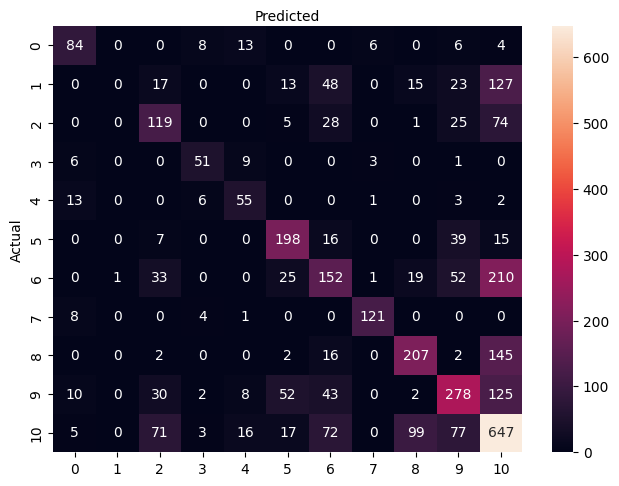

In [ ]:
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

classes = ["Acoustic/Folk", "Alt Music", "Blues", "Bollywood", "Country", "HipHop", "Indie", "Instrumental", "Metal", "Pop", "Rock"]

cm = confusion_matrix(true_labels, pred_labels)

fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')